<a href="https://colab.research.google.com/github/usmanqadeer1/AI-MLProjects/blob/master/Tensorflow_Specialization/NLP_Shakespeare.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
import tensorflow.keras.utils as ku 
import numpy as np 

In [2]:
tokenizer = Tokenizer()
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sonnets.txt \
    -O /tmp/sonnets.txt
data = open('/tmp/sonnets.txt').read()

corpus = data.lower().split("\n")


tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

# create input sequences using list of tokens
input_sequences = []
for line in corpus:
	token_list = tokenizer.texts_to_sequences([line])[0]
	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[:i+1]
		input_sequences.append(n_gram_sequence)


# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# create predictors and label
predictors, label = input_sequences[:,:-1],input_sequences[:,-1]

label = ku.to_categorical(label, num_classes=total_words)

--2020-09-20 17:55:30--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sonnets.txt
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.202.128, 74.125.124.128, 172.217.212.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.202.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 93578 (91K) [text/plain]
Saving to: ‘/tmp/sonnets.txt’

/tmp/sonnets.txt    100%[===================>]  91.38K  --.-KB/s    in 0.001s  

2020-09-20 17:55:30 (118 MB/s) - ‘/tmp/sonnets.txt’ saved [93578/93578]



In [12]:
model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(150, return_sequences = True)))
model.add(Dropout(0.2))
model.add(LSTM(100))
model.add(Dense(total_words/2, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(total_words, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 10, 100)           321100    
_________________________________________________________________
bidirectional_2 (Bidirection (None, 10, 300)           301200    
_________________________________________________________________
dropout_2 (Dropout)          (None, 10, 300)           0         
_________________________________________________________________
lstm_5 (LSTM)                (None, 100)               160400    
_________________________________________________________________
dense_4 (Dense)              (None, 1605)              162105    
_________________________________________________________________
dense_5 (Dense)              (None, 3211)              5156866   
Total params: 6,101,671
Trainable params: 6,101,671
Non-trainable params: 0
____________________________________________

In [13]:
 history = model.fit(predictors, label, epochs=200, verbose=1)

Epoch 1/200
484/484 [==============================] - 6s 12ms/step - loss: 6.9035 - accuracy: 0.0227
Epoch 2/200
484/484 [==============================] - 6s 12ms/step - loss: 6.4987 - accuracy: 0.0218
Epoch 3/200
484/484 [==============================] - 6s 12ms/step - loss: 6.3871 - accuracy: 0.0244
Epoch 4/200
484/484 [==============================] - 6s 12ms/step - loss: 6.2555 - accuracy: 0.0315
Epoch 5/200
484/484 [==============================] - 6s 12ms/step - loss: 6.1590 - accuracy: 0.0360
Epoch 6/200
484/484 [==============================] - 6s 12ms/step - loss: 6.0763 - accuracy: 0.0390
Epoch 7/200
484/484 [==============================] - 6s 12ms/step - loss: 5.9942 - accuracy: 0.0404
Epoch 8/200
484/484 [==============================] - 6s 12ms/step - loss: 5.9083 - accuracy: 0.0465
Epoch 9/200
484/484 [==============================] - 6s 12ms/step - loss: 5.8039 - accuracy: 0.0541
Epoch 10/200
484/484 [==============================] - 6s 12ms/step - loss: 5.690

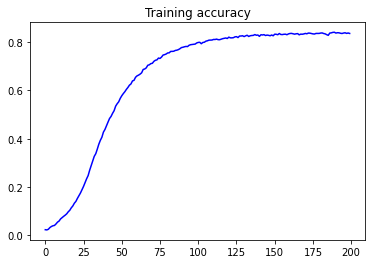

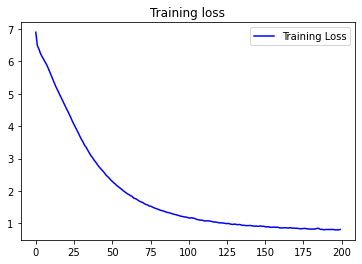

In [14]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
loss = history.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.title('Training accuracy')

plt.figure()

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.title('Training loss')
plt.legend()

plt.show()

In [11]:
import pprint as pp
seed_text = "Help me Obi Wan Kenobi, you're my only hope"
next_words = 100
  
for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	predicted = model.predict_classes(token_list, verbose=0)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word
pp.pprint(seed_text)

("Help me Obi Wan Kenobi, you're my only hope knows from men ' so near ' did "
 'proceed sorrow torn lies used did view bear thee lies none wrong young hath '
 "seen blot to winter's ride light light skill about free free free ' did play "
 "desire none wrong deeds was none did play do none kind ' did lie doth be eye "
 "new be pride doth dwell the sun light past confined doom lies junes burn'd "
 'greater bower rare skill clearer skill clearer light light rare rhyme alive '
 'of life desire skill date night in night away or wrong weeds light light '
 'alive do time hence men wrong')
